##                                  Importation des librairies et des fichiers csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
dispo_alim = pd.read_csv("dispo_alimentaire.csv")
sous_nutri = pd.read_csv("sous_nutrition.csv")
popula = pd.read_csv("population.csv")
aide_alim = pd.read_csv("aide_alimentaire.csv")

## Trie des données des fichiers csv

#### Pour eviter toutes erreurs futur, il est nécessaire de bien trier et modifier les donnés des dataframes.
Cela consiste, à :
-  Remplacer certains caractère speciaux (comme les -,^,¨,& ...etc) ou des accentuations (é,è ...etc) (.str.replace())
-  Remplacer toutes les majuscules du jeu de donnée par des minuscules, (.str.lower())
-  Renommer certaines colonnes (.columns.str.replace())
-  Convertir certaines lignes d'un jeu de donnée à une unité precise,
-  Verifier le types de donnée des colonnes de chaque dataframes et changer leur nature si cela doit etre fait.(.dtypes)
-  Verifier la présence de valeurs manquantes ou de doublons avec isna().mean() ou duplicated().mean() et les traiter avec .fillna() 
-  Modifier certaines données pour qu'elle soit identique dans tout les autres jeu de donnée au cas où nous utiliserons pour faire une jointure
-  Verifier si chaque dataframes presente des valeurs manquantes, et les traiter si nécessaire.
        C'est en effet ce que je fait pour l'ensemble des dataframes sur lequels nous travaillons.

In [2]:
dispo_alim.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [3]:
dispo_alim.dtypes

Zone                                                              object
Produit                                                           object
Origine                                                           object
Aliments pour animaux                                            float64
Autres Utilisations                                              float64
Disponibilité alimentaire (Kcal/personne/jour)                   float64
Disponibilité alimentaire en quantité (kg/personne/an)           float64
Disponibilité de matière grasse en quantité (g/personne/jour)    float64
Disponibilité de protéines en quantité (g/personne/jour)         float64
Disponibilité intérieure                                         float64
Exportations - Quantité                                          float64
Importations - Quantité                                          float64
Nourriture                                                       float64
Pertes                                             

In [4]:
dispo_alim.isna().sum()

Zone                                                                 0
Produit                                                              0
Origine                                                              0
Aliments pour animaux                                            12885
Autres Utilisations                                              10109
Disponibilité alimentaire (Kcal/personne/jour)                    1364
Disponibilité alimentaire en quantité (kg/personne/an)            1590
Disponibilité de matière grasse en quantité (g/personne/jour)     3811
Disponibilité de protéines en quantité (g/personne/jour)          4044
Disponibilité intérieure                                           223
Exportations - Quantité                                           3379
Importations - Quantité                                            753
Nourriture                                                        1590
Pertes                                                           11327
Produc

On remarque ici la presence de valeur manquantes. 

Vu le nombre de valeurs manquantes present sur notre dataframes, je prend la decision de changer les valeurs manquantes par des 0. 

Car si on vennais a supprimé les lignes où les valeurs manquantes sont presentes, il nous ne restera pas assez de donnée significative pour effectuer notre étude.

Il est aussi possible d'imputé ces derniere par la moyenne, cela pourrait etre une bonne idée en verifiant bien que cela ne donne pas des données moins pertinentes.

Nous remplacons donc les valeurs manquantes par des 0:

In [5]:
dispo_alim.columns = dispo_alim.columns.str.lower()
dispo_alim.columns = dispo_alim.columns.str.replace('é','e')
dispo_alim.columns = dispo_alim.columns.str.replace('è','e')
dispo_alim.columns = dispo_alim.columns.str.replace('-','_')
dispo_alim.columns = dispo_alim.columns.str.replace('kcal','cal')
dispo_alim.rename(columns={'zone' : 'pays'}, inplace=True)
dispo_alim['pays'] = dispo_alim['pays'].replace(['tchequie (la)'],'tchequie')
var_modif = [ 'produit', 'pays','origine']

for var in var_modif:
    dispo_alim[var] = dispo_alim[var].str.replace("é","e")
    dispo_alim[var] = dispo_alim[var].str.lower()
    dispo_alim[var] = dispo_alim[var].str.replace("è",'e')
    dispo_alim[var] = dispo_alim[var].str.replace("-",'_')
    dispo_alim[var] = dispo_alim[var].str.replace("&",' et ')
    dispo_alim[var] = dispo_alim[var].str.replace("'",'_')
    dispo_alim[var] = dispo_alim[var].str.replace("ï",'i')
    dispo_alim[var] = dispo_alim[var].str.replace("î",'i')
    dispo_alim[var] = dispo_alim[var].str.replace("ô",'o')
    dispo_alim[var] = dispo_alim[var].str.replace("/",'_')
    dispo_alim[var] = dispo_alim[var].str.replace("ë",'e')

dispo_alim.fillna(0, inplace=True)
dispo_alim.isna().mean()

var1 = ['aliments pour animaux','autres utilisations','disponibilite interieure','exportations _ quantite','importations _ quantite','nourriture','pertes','production','semences','traitement','variation de stock']

for var in var1:
    dispo_alim[var] = dispo_alim[var]*10**6

In [6]:
sous_nutri.columns = sous_nutri.columns.str.lower()
sous_nutri.columns = sous_nutri.columns.str.replace('é','e')
sous_nutri.columns = sous_nutri.columns.str.replace('è','e')
sous_nutri.columns = sous_nutri.columns.str.replace('-','_')
sous_nutri.rename(columns={'zone' : 'pays'}, inplace=True)
sous_nutri.rename(columns={'valeur' : 'nbr prsn en sous alim en millions'}, inplace=True)
var_modif = [ 'pays']

for var in var_modif:
    sous_nutri[var] = sous_nutri[var].str.replace("é","e")
    sous_nutri[var] = sous_nutri[var].str.lower()
    sous_nutri[var] = sous_nutri[var].str.replace("è",'e')
    sous_nutri[var] = sous_nutri[var].str.replace("-",'_')
    sous_nutri[var] = sous_nutri[var].str.replace("&",' et ')
    sous_nutri[var] = sous_nutri[var].str.replace("'",'_')
    sous_nutri[var] = sous_nutri[var].str.replace("ï",'i')
    sous_nutri[var] = sous_nutri[var].str.replace("î",'i')
    sous_nutri[var] = sous_nutri[var].str.replace("ô",'o')
    sous_nutri[var] = sous_nutri[var].str.replace("/",'_')
    sous_nutri[var] = sous_nutri[var].str.replace("ë",'e')

var_modif2 = ['annee']

for var2 in var_modif2:
    sous_nutri[var2] = sous_nutri[var2].str.replace('2012-2014','2013')
    sous_nutri[var2] = sous_nutri[var2].str.replace('2013-2015','2014')
    sous_nutri[var2] = sous_nutri[var2].str.replace('2014-2016','2015')
    sous_nutri[var2] = sous_nutri[var2].str.replace('2015-2017','2016')
    sous_nutri[var2] = sous_nutri[var2].str.replace('2016-2018','2017')
    sous_nutri[var2] = sous_nutri[var2].str.replace('2017-2019','2018')

In [7]:
sous_nutri.head(10)

,pays,annee,nbr prsn en sous alim en millions
0,afghanistan,2013,8.6
1,afghanistan,2014,8.8
2,afghanistan,2015,8.9
3,afghanistan,2016,9.7
4,afghanistan,2017,10.5
5,afghanistan,2018,11.1
6,afrique du sud,2013,2.2
7,afrique du sud,2014,2.5
8,afrique du sud,2015,2.8
9,afrique du sud,2016,3


In [8]:
sous_nutri.dtypes

pays                                 object
annee                                object
nbr prsn en sous alim en millions    object
dtype: object

A l'aide de la commande .dtypes ci dessus on s'apperçoit que la colonne 'nbr prsn en sous alim en millions' est considéré comme un types object (texte). 

On cherche donc a savoir pour qu'elle raison python le detecte comme un object et non un numerique. 

Pour cela nous allons faire une methode qui permet de voir l'ensemble des données de cette colonne, qui se nomme .unique() et essayer de trouver une annomalie.

In [9]:
sous_nutri['nbr prsn en sous alim en millions'].unique()

array(['8.6', '8.8', '8.9', '9.7', '10.5', '11.1', '2.2', '2.5', '2.8',
       '3', '3.1', '3.3', '0.1', '1.3', '1.2', nan, '7.6', '6.2', '5.3',
       '5.6', '5.8', '5.7', '1.5', '1.6', '1.1', '1.7', '<0.1', '21.7',
       '22.4', '23.3', '22.3', '21.5', '20.9', '0.8', '2', '1.9', '1.8',
       '0.4', '0.5', '0.3', '0.2', '3.2', '3.4', '3.6', '3.8', '2.1',
       '2.3', '2.4', '0.6', '0.7', '0.9', '3.9', '2.7', '1.4', '4.8',
       '4.6', '4.9', '5', '4.4', '4.3', '4.2', '4.5', '26.2', '24.3',
       '21.3', '21.1', '2.9', '5.1', '5.2', '5.4', '203.8', '198.3',
       '193.1', '190.9', '190.1', '189.2', '23.6', '24', '24.1', '3.7',
       '7.3', '7.8', '8.4', '9', '9.1', '10.1', '10', '10.7', '11.5',
       '11.9', '11.8', '8.7', '10.3', '11', '1', '5.5', '6.8', '7.9',
       '5.9', '7', '9.2', '9.4', '9.6', '6.7', '7.1', '7.2', '14.7',
       '17.4', '20.2', '22.2', '22.8', '24.6', '31.1', '28.5', '25.4',
       '24.8', '26.1', '14.5', '15.4', '16.5', '15.8', '15.7', '10.8',
       '

On peut voir la presence d'une valeur manquante mais celle si n'a aucune influence sur le type de donné de la colonne.

Au contraire on peut aussi voir la présence d'une valeur qui est '<0.1', la présence de celle-ci est la raison pour laquelle python declare cette colone comme object. 

On va donc devoir remplacer cette valeur. 

Deux choix s'offre a nous, soit la remplacer par 0 ou par 0.1 en considerant que 0.1 = 100.000 personnes en sous alimentation. 
    Peut importe le choix que nous allons faire, statistiquement parlant cela n'aura pas une grande importance.

On remplace donc la valeur, et ensuite on converti la colonne en numeric. ( pd.to_numeric )

In [10]:
sous_nutri = sous_nutri.replace('<0.1','0')

In [11]:
sous_nutri['nbr prsn en sous alim en millions'].unique()

array(['8.6', '8.8', '8.9', '9.7', '10.5', '11.1', '2.2', '2.5', '2.8',
       '3', '3.1', '3.3', '0.1', '1.3', '1.2', nan, '7.6', '6.2', '5.3',
       '5.6', '5.8', '5.7', '1.5', '1.6', '1.1', '1.7', '0', '21.7',
       '22.4', '23.3', '22.3', '21.5', '20.9', '0.8', '2', '1.9', '1.8',
       '0.4', '0.5', '0.3', '0.2', '3.2', '3.4', '3.6', '3.8', '2.1',
       '2.3', '2.4', '0.6', '0.7', '0.9', '3.9', '2.7', '1.4', '4.8',
       '4.6', '4.9', '5', '4.4', '4.3', '4.2', '4.5', '26.2', '24.3',
       '21.3', '21.1', '2.9', '5.1', '5.2', '5.4', '203.8', '198.3',
       '193.1', '190.9', '190.1', '189.2', '23.6', '24', '24.1', '3.7',
       '7.3', '7.8', '8.4', '9', '9.1', '10.1', '10', '10.7', '11.5',
       '11.9', '11.8', '8.7', '10.3', '11', '1', '5.5', '6.8', '7.9',
       '5.9', '7', '9.2', '9.4', '9.6', '6.7', '7.1', '7.2', '14.7',
       '17.4', '20.2', '22.2', '22.8', '24.6', '31.1', '28.5', '25.4',
       '24.8', '26.1', '14.5', '15.4', '16.5', '15.8', '15.7', '10.8',
       '11.

In [12]:
sous_nutri['nbr prsn en sous alim en millions'] = pd.to_numeric(sous_nutri['nbr prsn en sous alim en millions'])
sous_nutri['annee'] = pd.to_numeric(sous_nutri['annee'])

In [13]:
sous_nutri.dtypes

pays                                  object
annee                                  int64
nbr prsn en sous alim en millions    float64
dtype: object

On utilise la methode .isna().mean() , pour avoir le nombre moyen de valeur manquante dans les colonnes dataframe sous_nutri

In [14]:
sous_nutri.isna().mean()

pays                                 0.000000
annee                                0.000000
nbr prsn en sous alim en millions    0.487685
dtype: float64

Pareil que pour le dataframe dispo_alim, on s'appercoit que le pourcentage de valeurs manquantes et trop grand pour supprimer les les lignes où les valeurs manquantes sont presente. 

On remplace donc les valeurs manquantes par 0.

In [15]:
sous_nutri.fillna(0, inplace=True)

In [16]:
sous_nutri.isna().sum()

pays                                 0
annee                                0
nbr prsn en sous alim en millions    0
dtype: int64

In [17]:
sous_nutri['nbr prsn en sous alim en millions'].unique()

array([8.600e+00, 8.800e+00, 8.900e+00, 9.700e+00, 1.050e+01, 1.110e+01,
       2.200e+00, 2.500e+00, 2.800e+00, 3.000e+00, 3.100e+00, 3.300e+00,
       1.000e-01, 1.300e+00, 1.200e+00, 0.000e+00, 7.600e+00, 6.200e+00,
       5.300e+00, 5.600e+00, 5.800e+00, 5.700e+00, 1.500e+00, 1.600e+00,
       1.100e+00, 1.700e+00, 2.170e+01, 2.240e+01, 2.330e+01, 2.230e+01,
       2.150e+01, 2.090e+01, 8.000e-01, 2.000e+00, 1.900e+00, 1.800e+00,
       4.000e-01, 5.000e-01, 3.000e-01, 2.000e-01, 3.200e+00, 3.400e+00,
       3.600e+00, 3.800e+00, 2.100e+00, 2.300e+00, 2.400e+00, 6.000e-01,
       7.000e-01, 9.000e-01, 3.900e+00, 2.700e+00, 1.400e+00, 4.800e+00,
       4.600e+00, 4.900e+00, 5.000e+00, 4.400e+00, 4.300e+00, 4.200e+00,
       4.500e+00, 2.620e+01, 2.430e+01, 2.130e+01, 2.110e+01, 2.900e+00,
       5.100e+00, 5.200e+00, 5.400e+00, 2.038e+02, 1.983e+02, 1.931e+02,
       1.909e+02, 1.901e+02, 1.892e+02, 2.360e+01, 2.400e+01, 2.410e+01,
       3.700e+00, 7.300e+00, 7.800e+00, 8.400e+00, 

Ensuite, on multiplie par 10 puissance 6 pour avoir le nombre de personne en sous alimentation en millions. 

In [18]:
sous_nutri['nbr prsn en sous alim en millions'] = sous_nutri['nbr prsn en sous alim en millions']*10**6

In [19]:
sous_nutri.head()

,pays,annee,nbr prsn en sous alim en millions
0,afghanistan,2013,8600000.0
1,afghanistan,2014,8800000.0
2,afghanistan,2015,8900000.0
3,afghanistan,2016,9700000.0
4,afghanistan,2017,10500000.0


In [20]:
popula.columns = popula.columns.str.lower()
popula.columns = popula.columns.str.replace('é','e')
popula.columns = popula.columns.str.replace('è','e')
popula.columns = popula.columns.str.replace('-','_')
popula.rename(columns={'valeur' : 'nbr habitant en milliers'}, inplace=True)
popula.rename(columns={'zone' : 'pays'}, inplace=True)
popula['pays'] = popula['pays'].replace(['royaume uni de grande bretagne et dirlande du nord'],'Royaume-Uni')
popula['nbr habitant en milliers'] = popula['nbr habitant en milliers']*10**3
popula.rename(columns={'nbr habitant en milliers' : 'nbr habitant en millions'}, inplace=True)

var_modif = [ 'pays']

for var in var_modif:
    popula[var] = popula[var].str.replace("é","e")
    popula[var] = popula[var].str.lower()
    popula[var] = popula[var].str.replace("è",'e')
    popula[var] = popula[var].str.replace("-",'_')
    popula[var] = popula[var].str.replace("&",' et ')
    popula[var] = popula[var].str.replace("'",'_')
    popula[var] = popula[var].str.replace("ï",'i')
    popula[var] = popula[var].str.replace("î",'i')
    popula[var] = popula[var].str.replace("ô",'o')
    popula[var] = popula[var].str.replace("/",'_')
    popula[var] = popula[var].str.replace("ë",'e')



In [21]:
popula.head()

,pays,annee,nbr habitant en millions
0,afghanistan,2013,32269589.0
1,afghanistan,2014,33370794.0
2,afghanistan,2015,34413603.0
3,afghanistan,2016,35383032.0
4,afghanistan,2017,36296113.0


In [22]:
popula.dtypes

pays                         object
annee                         int64
nbr habitant en millions    float64
dtype: object

In [23]:
popula.isna().mean()

pays                        0.0
annee                       0.0
nbr habitant en millions    0.0
dtype: float64

In [24]:
aide_alim.columns = aide_alim.columns.str.lower()
aide_alim.columns = aide_alim.columns.str.replace('é','e')
aide_alim.columns = aide_alim.columns.str.replace('è','e')
aide_alim.rename(columns={'valeur' : 'quantite acquis en kg'}, inplace=True)
aide_alim.rename(columns={'pays beneficiaire' : 'pays'}, inplace=True)
aide_alim['pays'] = aide_alim['pays'].replace(['swaziland'],'eswatini')
aide_alim['quantite acquis en kg'] = aide_alim['quantite acquis en kg']*10**3

var_modif = [ 'produit', 'pays']

for var in var_modif:
    aide_alim[var] = aide_alim[var].str.replace("é","e")
    aide_alim[var] = aide_alim[var].str.lower()
    aide_alim[var] = aide_alim[var].str.replace("è",'e')
    aide_alim[var] = aide_alim[var].str.replace("-",'_')
    aide_alim[var] = aide_alim[var].str.replace("&",' et ')
    aide_alim[var] = aide_alim[var].str.replace("'",'_')

In [25]:
aide_alim.head()

,pays,annee,produit,quantite acquis en kg
0,afghanistan,2013,autres non_cereales,682000
1,afghanistan,2014,autres non_cereales,335000
2,afghanistan,2013,ble et farin,39224000
3,afghanistan,2014,ble et farin,15160000
4,afghanistan,2013,cereales,40504000


In [26]:
aide_alim['annee'].unique()

array([2013, 2014, 2015, 2016], dtype=int64)

In [27]:
aide_alim.dtypes

pays                     object
annee                     int64
produit                  object
quantite acquis en kg     int64
dtype: object

 ###      Question I  -      PROPORTION DES PERSONNES EN ETAT DE SOUS NUTRITION EN 2017

Pour calculer la proportion des personnes en état de sous nutrition en 2017 , nous avons besoin tout d'abord :

    - De la population mondiale en 2017
    - De la population mondiale en état de sous nutrition en 2017
    - Et de calculer sa proportion a l'aide de ces deux données.

In [28]:
# Jointure intérieure entre les dataframes population et sous nutrition avec pays comme clé commune
popu_X_sousnutri = pd.merge(sous_nutri.loc[sous_nutri['annee'] == 2017 ,['pays','nbr prsn en sous alim en millions']] ,popula.loc[popula['annee']==2017 ,['pays','nbr habitant en millions']], on='pays' ,how='inner')
popu_X_sousnutri.head()

,pays,nbr prsn en sous alim en millions,nbr habitant en millions
0,afghanistan,10500000.0,36296113.0
1,afrique du sud,3100000.0,57009756.0
2,albanie,100000.0,2884169.0
3,algerie,1300000.0,41389189.0
4,allemagne,0.0,82658409.0


In [29]:
# Calcul de la population mondiale en 2017
population_mondiale_2017 = popu_X_sousnutri['nbr habitant en millions'].sum()
print('La population mondiale en 2017 s éleve a ' + str(round(population_mondiale_2017)) + ' habitants.')

La population mondiale en 2017 s éleve a 7543798779 habitants.


Nous avons calculer le nombre d'habitant dans le monde en 2017.

Nous allons maintenant calculer la nombre d'habitants en sous nutrition dans le monde en 2017

In [30]:
# Calcul du nombre de personnes en sous nutrion en 2017
nbr_prsn_sous_alim2017 = popu_X_sousnutri['nbr prsn en sous alim en millions'].sum() 
print('La population mondiale en etat de sous nutrition en 2017 s éleve a ' + str(round(nbr_prsn_sous_alim2017)) + ' habitants.')

La population mondiale en etat de sous nutrition en 2017 s éleve a 535700000 habitants.


Nous avons calculer la population mondiale en état de sous nutrition.

Nous disposons de toutes les données necessaires pour pour calculer la proportion de personnes en état de sous nutrition en 2017.

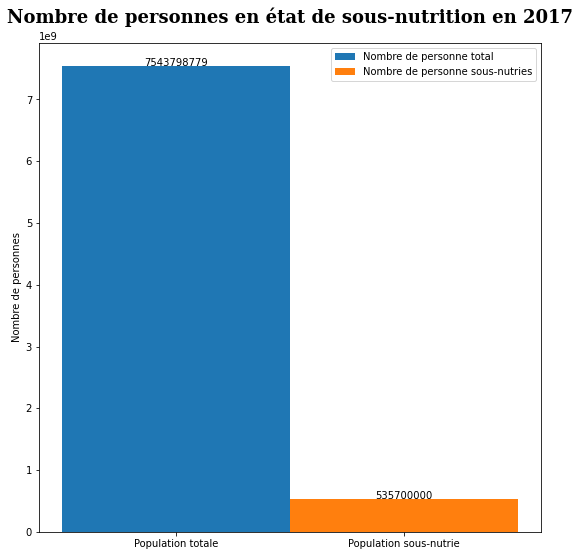

In [31]:
pop = [round(population_mondiale_2017)]
x2 = ["Population totale"]
x3 = ["Population sous-nutrie"]
sous_nutrie = [(round(nbr_prsn_sous_alim2017))]

plt.figure(figsize=(9,9))
plt.bar(x2, pop,  width= 1, label="Nombre de personne total")
plt.bar(x3, sous_nutrie, width= 1, label="Nombre de personne sous-nutries")
plt.title("Nombre de personnes en état de sous-nutrition en 2017", pad=(20),
          fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 18});
i = 0
j = 1
for i in range(len(x2)):
    plt.annotate(pop[i], ( i, pop[i] + j), ha="center")
i = 0
j = 1
for i in range(len(x3)):
    plt.annotate(sous_nutrie[i], ( j, sous_nutrie[i] + j), ha="center")

plt.legend()
plt.ylabel("Nombre de personnes")
plt.show()

In [32]:
# Calcul de la proportion de personnes en sous alimentation dans le monde en 2017
prop_prsn_sous_alim_2017 = (nbr_prsn_sous_alim2017/population_mondiale_2017)*100
print('La proportion des personnes en état de sous alimentation dans le monde en 2017 est de ' + str(round(prop_prsn_sous_alim_2017 ,2)) + ' %' )

La proportion des personnes en état de sous alimentation dans le monde en 2017 est de 7.1 %


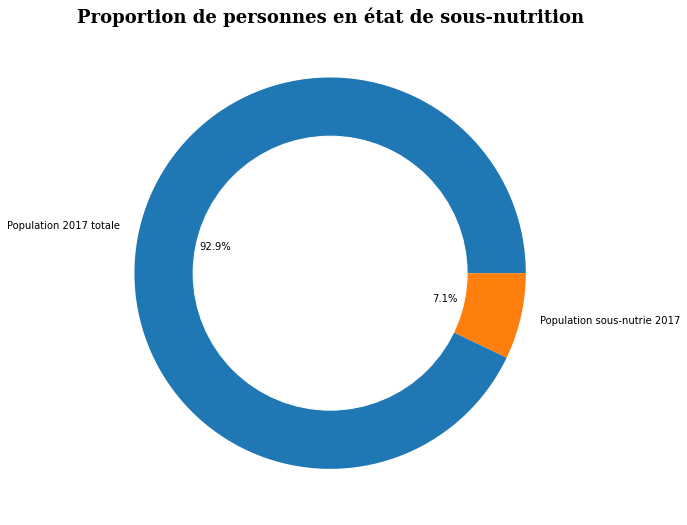

In [33]:
# Etablissement d'un graphique montrant la proportion de personnes en état de sous nutrition en 2017 à l'aide de la librairie matplolib
graph_popsousnutrie = [population_mondiale_2017-nbr_prsn_sous_alim2017,nbr_prsn_sous_alim2017]

plt.figure(figsize=(9,9))
plt.pie(graph_popsousnutrie, labels=["Population 2017 totale","Population sous-nutrie 2017"],
         normalize = True,
       autopct = lambda x: str(round(x, 2)) + '%' )
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title("Proportion de personnes en état de sous-nutrition",
          fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 18})
plt.show()

### - Mélanie nous demande de lui donné les pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017

Pour cela il faudrais que nous calculions tout d'abord la proportion des personnes en sous nutrition pour chaque pays en 2017 : 

In [34]:
popu_X_sousnutri.head()

,pays,nbr prsn en sous alim en millions,nbr habitant en millions
0,afghanistan,10500000.0,36296113.0
1,afrique du sud,3100000.0,57009756.0
2,albanie,100000.0,2884169.0
3,algerie,1300000.0,41389189.0
4,allemagne,0.0,82658409.0


In [35]:
# Calcul de la proportion de personnes en sous alimentation par pays.
prop_par_pays = round((popu_X_sousnutri['nbr prsn en sous alim en millions']/popu_X_sousnutri['nbr habitant en millions']) *100.2)

In [36]:
# Rajout d'une colonne proportion par pays dans le data frame popuXsous_nutri.
popu_X_sousnutri['prop par pays'] = prop_par_pays
popu_X_sousnutri.head()

,pays,nbr prsn en sous alim en millions,nbr habitant en millions,prop par pays
0,afghanistan,10500000.0,36296113.0,29.0
1,afrique du sud,3100000.0,57009756.0,5.0
2,albanie,100000.0,2884169.0,3.0
3,algerie,1300000.0,41389189.0,3.0
4,allemagne,0.0,82658409.0,0.0


In [37]:
# Classement par ordre décroissant.
popu_X_sousnutri = popu_X_sousnutri.sort_values(['prop par pays'], ascending=False)
popu_X_sousnutri.head()

,pays,nbr prsn en sous alim en millions,nbr habitant en millions,prop par pays
78,haiti,5300000.0,10982366.0,48.0
157,republique populaire democratique de coree,12000000.0,25429825.0,47.0
108,madagascar,10500000.0,25570512.0,41.0
103,liberia,1800000.0,4702226.0,38.0
183,tchad,5700000.0,15016753.0,38.0


In [38]:
# Etablissement d'un tableau avec uniquement les colonnes pays et proportion par pays et sortir les 20 premieres lignes.
top20_pays_sousnutri = popu_X_sousnutri[['pays','prop par pays']].head(20)
top20_pays_sousnutri

,pays,prop par pays
78,haiti,48.0
157,republique populaire democratique de coree,47.0
108,madagascar,41.0
103,liberia,38.0
183,tchad,38.0
100,lesotho,38.0
161,rwanda,35.0
121,mozambique,33.0
186,timor_leste,32.0
0,afghanistan,29.0


In [39]:
top20_pays_sousnutri['prop par pays'].tolist()

[48.0,
 47.0,
 41.0,
 38.0,
 38.0,
 38.0,
 35.0,
 33.0,
 32.0,
 29.0,
 27.0,
 27.0,
 27.0,
 25.0,
 24.0,
 24.0,
 23.0,
 21.0,
 20.0,
 20.0]

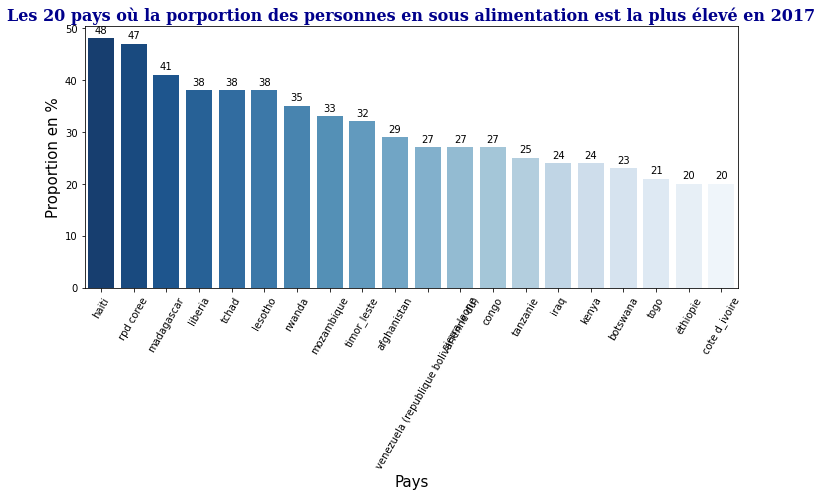

In [40]:
Liste = [48,47,41,38,38,38,35,33,32,29,27,27,27,25,24,24,23,21,20,20] 
# Arrangement des nom de pays pour que le graphique suivant soit plus lisible.
top20_pays_sousnutri['pays'] = top20_pays_sousnutri['pays'].str.replace("republique populaire democratique de coree","rpd coree")
top20_pays_sousnutri['pays'] = top20_pays_sousnutri['pays'].str.replace("republique_unie de tanzanie","tanzanie")
top20_pays_sousnutri['pays'] = top20_pays_sousnutri['pays'].str.replace("venezuela republique bolivarienne du","venezuela")
plt.show()
# Etablissement d'un diagramme montrant les 20 pays où la proportion des personnes en sous nutrition est la plus élevé en 2017
plt.figure(figsize=(10,7))
sns.barplot(y=top20_pays_sousnutri['prop par pays'], x= top20_pays_sousnutri['pays'] ,palette="Blues_r")
plt.xlabel('Pays', fontsize=15)
plt.ylabel("Proportion en %", fontsize=15)
plt.title("Les 20 pays où la porportion des personnes en sous alimentation est la plus élevé en 2017" , fontsize=16,
          fontdict={'family':'serif','color' : 'darkblue','weight' : 'bold', 'size' : 30})
plt.xticks(rotation= 60)
i = 0
j = 1
for i in range(len(top20_pays_sousnutri)):
    plt.annotate(Liste[i], ( i, Liste[i] + j), ha="center")
plt.tight_layout()


### Mélanie nous a demander ensuite de lui donner les pays qui ont le plus bénéficié d’aide alimentaire depuis 2013

In [41]:
aide_alim.head()

,pays,annee,produit,quantite acquis en kg
0,afghanistan,2013,autres non_cereales,682000
1,afghanistan,2014,autres non_cereales,335000
2,afghanistan,2013,ble et farin,39224000
3,afghanistan,2014,ble et farin,15160000
4,afghanistan,2013,cereales,40504000


Pour trouver le nombre de fois qu'un pays a bénéficier d'aide alimentaire, il suffit de calculer le nombre de fois que celui ci apparrait dans le dataframe depuis 2013.

In [42]:
# Somme de la quantité acquis en kg par pays et classement par ordre décroissant
quant_aide_alim_pp = aide_alim.groupby(['pays']).sum().sort_values(by='quantite acquis en kg',ascending=False).head(10)
quant_aide_alim_pp

,annee,quantite acquis en kg
pays,,
republique arabe syrienne,76543,1858943000
éthiopie,66460,1381294000
yemen,76553,1206484000
soudan du sud,44309,695248000
soudan,48335,669784000
kenya,54376,552836000
bangladesh,50347,348188000
somalie,54377,292678000
republique democratique du congo,50350,288502000


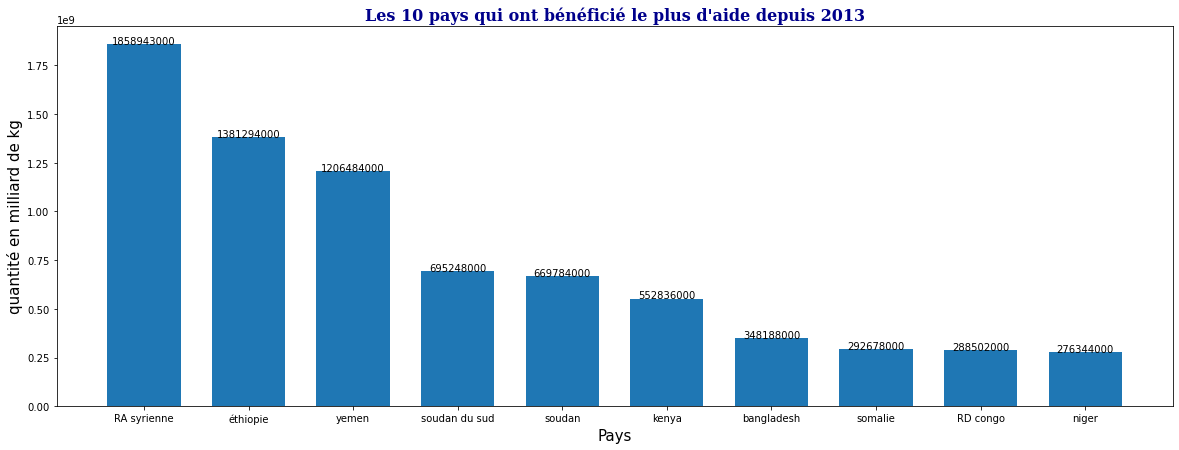

In [43]:
Pays = ('RA syrienne','éthiopie','yemen','soudan du sud','soudan','kenya','bangladesh','somalie','RD congo','niger')
Valeur = (1858943000,1381294000,1206484000,695248000,669784000,552836000,348188000,292678000,288502000,276344000)    
plt.figure(figsize=(20,7))
plt.bar(Pays,Valeur,width=0.7)
plt.title("Les 10 pays qui ont bénéficié le plus d'aide depuis 2013" , fontsize=16,
         fontdict={'family':'serif','color' : 'darkblue','weight' : 'bold', 'size' : 30}) 
plt.xlabel('Pays', fontsize=15) 
plt.ylabel("quantité en milliard de kg", fontsize=15) 
i = 0
j = 1
for i in range(len(quant_aide_alim_pp)):
    plt.annotate(Valeur[i], ( i, Valeur[i] + j), ha="center")

plt.show()


### Question II - Nombre théorique de personnes qui pourraient être nourries

Pour calculer le nombre théorique de personnes pouvant être nourries nous devons tous d'abord calculer la disponibilité alimentaire mondiale.

Et a partir de la disponibilité alimentaire mondiale, on calcul le nombre théorique de personnes pouvant etre nourrie en 2017 dans le monde.

In [44]:
# Jointure a gauche entre les dataframes dispo_alim et population_2017 (df1) avec comme clé commune pays
dispo_popula = pd.merge(dispo_alim, popula.loc[popula['annee']==2017,['pays','nbr habitant en millions']], on='pays', how='left')
dispo_popula.head()



,pays,produit,origine,aliments pour animaux,autres utilisations,disponibilite alimentaire (cal/personne/jour),disponibilite alimentaire en quantite (kg/personne/an),disponibilite de matiere grasse en quantite (g/personne/jour),disponibilite de proteines en quantite (g/personne/jour),disponibilite interieure,exportations _ quantite,importations _ quantite,nourriture,pertes,production,semences,traitement,variation de stock,nbr habitant en millions
0,afghanistan,abats comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0,36296113.0
1,afghanistan,"agrumes, autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,36296113.0
2,afghanistan,aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,36296113.0
3,afghanistan,ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36296113.0
4,afghanistan,bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,36296113.0


In [45]:
# Calcul de la disponibilité alimentaire mondiale 
dispo_alim_mondiale = ((dispo_popula['disponibilite alimentaire (cal/personne/jour)'])*(dispo_popula['nbr habitant en millions'])*365)
print('la disponibilité alimentaire mondiale en 2017 est de ' + str(dispo_alim_mondiale.sum()) + ' cal')


la disponibilité alimentaire mondiale en 2017 est de 7635429388975815.0 cal


On sais qu'en moyenne une personne 2500 calories par jour. 

Maintenant que nous avons cette donné nous pouvons calculer le nombre théorique de personne pouvant etre nourris.

In [46]:
# Calcul du nombre théorique de personnes pouvant etre nourris dans le monde
nombre_theorique_prsn_nourri = dispo_alim_mondiale.sum()/(2500*365)
print('Le nombre théorique de personnes pouvant etre nourris dans le monde en 2017 est de ' + str("{:.0f}".format(nombre_theorique_prsn_nourri)) 
      + ' personnes') 

Le nombre théorique de personnes pouvant etre nourris dans le monde en 2017 est de 8367593851 personnes


In [47]:
# Calcul de la proportion de personne pouvant etre nourris dans le monde
prop_nbr_prs_nouris = ((nombre_theorique_prsn_nourri)*100/population_mondiale_2017)
print('La proportion du nombre de personnes pouvant etre nourris dans le monde en 2017 est de '+ str("{:.2f}".format(prop_nbr_prs_nouris)) + ' %.')

La proportion du nombre de personnes pouvant etre nourris dans le monde en 2017 est de 110.92 %.


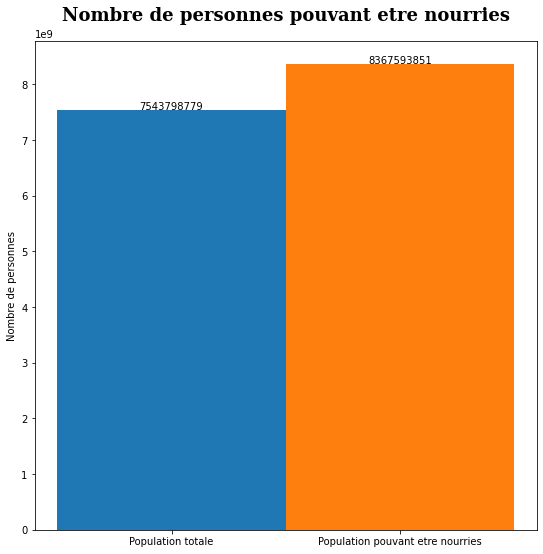

In [48]:
pop = [round(population_mondiale_2017)]
x2 = ["Population totale"]
x3 = ["Population pouvant etre nourries"]
popu_pouvant_nourrie = [round(nombre_theorique_prsn_nourri)]

plt.figure(figsize=(9,9))
plt.bar(x2, pop,  width= 1)
plt.bar(x3, popu_pouvant_nourrie, width= 1)
plt.title("Nombre de personnes pouvant etre nourries", pad=(20),
          fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 18});
i = 0
j = 1
# Annotating the bar plot with the values (proportion sous-nut)
for i in range(len(x2)):
    plt.annotate(pop[i], ( i, pop[i] + j), ha="center")
i = 0
j = 1
for i in range(len(x3)):
    plt.annotate(popu_pouvant_nourrie[i], ( j, popu_pouvant_nourrie[i] + j), ha="center")


plt.ylabel("Nombre de personnes")
plt.show()

### Question III - Le nombre théorique de personnes pouvant etre nourries a partir d'aliments d'origine végétales

In [49]:
# On veux uniquement les données de dispo_popula où l'origine du produit est végétale
df3 = dispo_popula.loc[dispo_popula['origine'] == 'vegetale']

In [50]:
# Calcul de la disponibilité alimentaire d'origine végétale mondiale.
dispo_alim_monde_veg = df3['disponibilite alimentaire (cal/personne/jour)']*365  * df3['nbr habitant en millions']
dispo_alim_monde_veg = dispo_alim_monde_veg.sum()
print('la disponibilité alimentaire dorigine végétales mondiale en 2017 est de ' + str(dispo_alim_monde_veg) + ' cal')

la disponibilité alimentaire dorigine végétales mondiale en 2017 est de 6300178937197865.0 cal


In [51]:
# Calcul du nombre de personne pouvant etre nourris avec les aliments d'origine végétale.
nombre_theorique_prsn_nourri_veg = round(dispo_alim_monde_veg/(2500*365))
print('Le nombre théorique de personnes pouvant etre nourris dans le monde en 2017 a l aide des aliments d origine vegetales            est de ' + str(nombre_theorique_prsn_nourri_veg) 
      + ' personnes') 

Le nombre théorique de personnes pouvant etre nourris dans le monde en 2017 a l aide des aliments d origine vegetales            est de 6904305685 personnes


In [52]:
# Calcul de la proportion des personnes pouvant etre nourris avec les aliments d'origine végétale.
prop_nbr_prs_nouris_veg = "{:.2f}".format(((nombre_theorique_prsn_nourri_veg)/population_mondiale_2017)*100)
print('La proportion du nombre de personnes pouvant etre nourris dans le monde avec des produits d origine végétales en 2017 est de   '+ str((prop_nbr_prs_nouris_veg)) + ' %.')

La proportion du nombre de personnes pouvant etre nourris dans le monde avec des produits d origine végétales en 2017 est de   91.52 %.


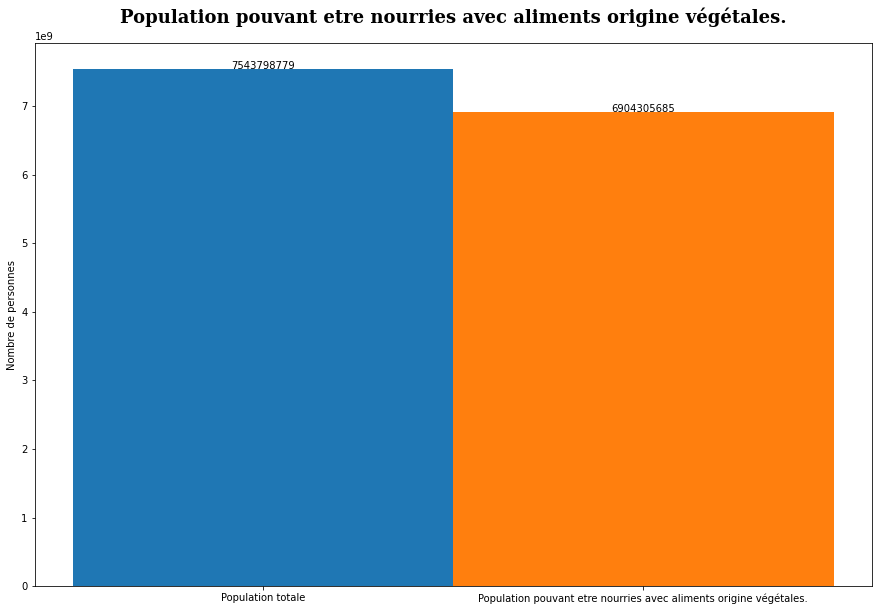

In [53]:
pop = [round(population_mondiale_2017)]
x2 = ["Population totale"]
x3 = ["Population pouvant etre nourries avec aliments origine végétales."]
popu_pouvant_nourrie_veg = [nombre_theorique_prsn_nourri_veg]

plt.figure(figsize=(15,10))
plt.bar(x2, pop,  width= 1)
plt.bar(x3, popu_pouvant_nourrie_veg, width= 1)
plt.title("Population pouvant etre nourries avec aliments origine végétales.", pad=(20),
          fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 18});
i = 0
j = 1
# Annotating the bar plot with the values (proportion sous-nut)
for i in range(len(x2)):
    plt.annotate(pop[i], ( i, pop[i] + j), ha="center")
i = 0
j = 1
for i in range(len(x3)):
    plt.annotate(popu_pouvant_nourrie_veg[i], ( j, popu_pouvant_nourrie_veg[i] + j), ha="center")



plt.ylabel("Nombre de personnes")
plt.show()

### Question IV - L'utilisation de la disponibilité interieure


On remarque la presence d'un lien logique entre les 10 variables quantitative du dataframe dispo_alim qui ce presente sous la forme d'une équation :

Semences + nourriture + perte + autre utilisation + aliments pour animaux + traitement = Disponibilité intérieure = Production + Importations - Exportations + Variation des stocks
 


In [54]:
# Grâce a la boucle for , je vais calculer les differentes part de l'utilisation de la disponibilité intérieure  
colonne = ['aliments pour animaux','nourriture','pertes','autres utilisations','semences','traitement']

for x in colonne:
    print('La part attribué à : '+ x + ' est : ' + str("{:.2f}".format((dispo_alim[x].sum()/dispo_alim['disponibilite interieure'].sum())*100)) + ' %')
    

La part attribué à : aliments pour animaux est : 13.24 %
La part attribué à : nourriture est : 49.51 %
La part attribué à : pertes est : 4.61 %
La part attribué à : autres utilisations est : 8.78 %
La part attribué à : semences est : 1.57 %
La part attribué à : traitement est : 22.38 %


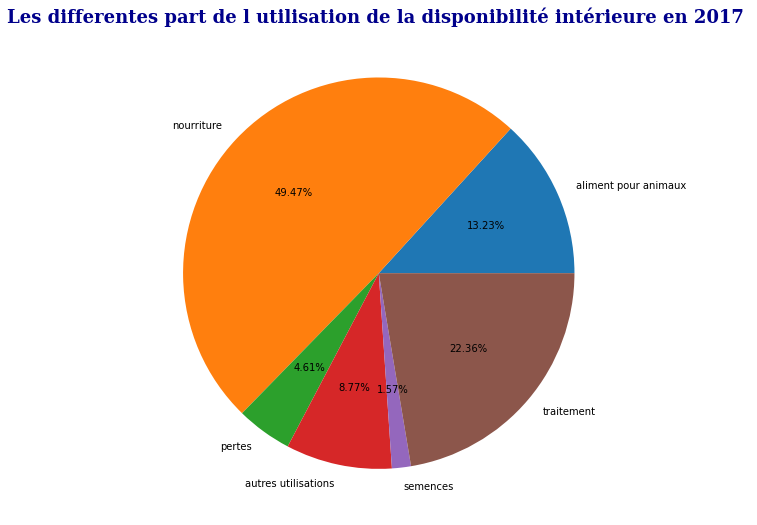

In [55]:
# Representation graphique des part de l'utilisation de la disponibilité intérieure en 2017
plt.figure(figsize=(9,9))
x = [13.24 ,49.51 ,4.61 ,8.78 ,1.57 ,22.38]
plt.pie(x, labels = ['aliment pour animaux', 'nourriture', 'pertes', 'autres utilisations','semences','traitement'],
        normalize = True,
        autopct = lambda x: str(round(x,2)) + '%')
plt.title('Les differentes part de l utilisation de la disponibilité intérieure en 2017 ',
                fontdict={'family':'serif',
                    'color' : 'darkblue',
                    'weight' : 'bold',
                    'size' : 18})              

plt.show()

### Question V - Etude de la répartion des céréales entre l'alimentation humaine et animal

Afin de repondre à cette question, nous allons d'abord chercher la liste des differents types de céréales dans le nouveau data frame importer à partir du site de la FAO.

In [56]:
# Importation du nouveau dataframe
cereales = pd.read_csv('liste_cereales2.csv')

In [57]:
# Visualisation de tout les types de céréales 
cereales['Produit'].unique()

array(['Bl? et produits', 'Riz (Eq Blanchi)', 'Orge et produits',
       'Ma?s et produits', 'Seigle et produits', 'Avoine',
       'Millet et produits', 'Sorgho et produits', 'C?r?ales, Autres'],
      dtype=object)

In [58]:
# Création d'une liste avec nos produits céréales.
liste_cerealees = ['ble et produits', 'riz et produits', 'orge et produits',
       'mais et produits', 'seigle et produits', 'avoine',
       'millet et produits', 'sorgho et produits', 'cereales, autres']

In [59]:
# Avoir dans un tableau uniquement les données des produits présents dans la liste ci dessus. 
cereales = dispo_alim.loc[dispo_alim["produit"].isin(liste_cerealees),]

In [60]:
# On calcul maintenant la disponibilité interieure total des céréales : 

dispo_int_cere_2017 = round(cereales['disponibilite interieure'].sum())
print('La disponibilité interieure total de céréales en 2017 est de ' + str(dispo_int_cere_2017) + ' kg .')

La disponibilité interieure total de céréales en 2017 est de 50892000000 kg .


In [61]:
# Grâce à une boucle FOR, on calcul les differentes part.
colonne = ['aliments pour animaux','nourriture','pertes','autres utilisations','semences','traitement']

for x in colonne:
    print('La part de céréales attribué à : '+ x + ' est : ' + str("{:.2f}".format((cereales[x].sum()/dispo_int_cere_2017)*100)) + ' %')


La part de céréales attribué à : aliments pour animaux est : 69.34 %
La part de céréales attribué à : nourriture est : 18.13 %
La part de céréales attribué à : pertes est : 2.55 %
La part de céréales attribué à : autres utilisations est : 3.13 %
La part de céréales attribué à : semences est : 7.25 %
La part de céréales attribué à : traitement est : 0.39 %


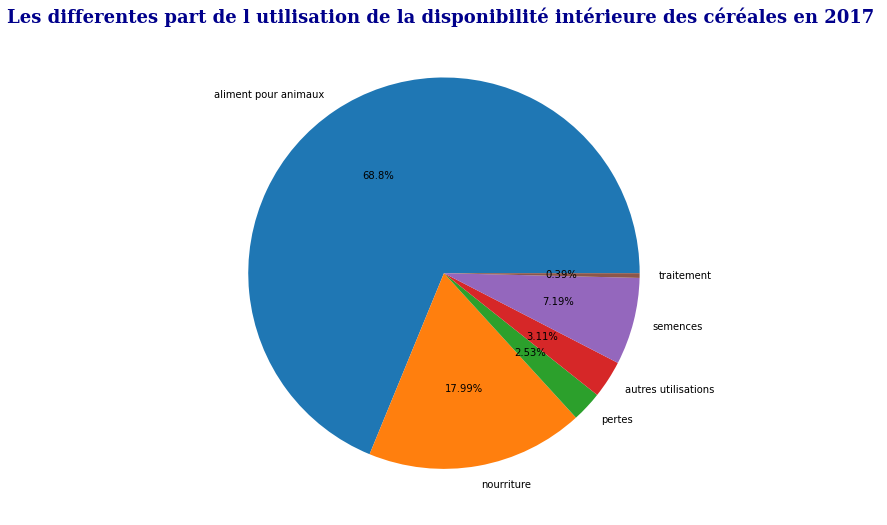

In [62]:
# Representation graphique des part de l'utilisation de la disponibilité intérieure des céréales en 2017

plt.figure(figsize=(9,9))
x = [69.34 ,18.13 ,2.55 ,3.13 ,7.25 ,0.39]
plt.pie(x, labels = ['aliment pour animaux', 'nourriture', 'pertes', 'autres utilisations','semences','traitement'],
        normalize = True,
        autopct = lambda x: str(round(x,2)) + '%')
plt.title('Les differentes part de l utilisation de la disponibilité intérieure des céréales en 2017 ',
fontdict={'family':'serif',
                    'color' : 'darkblue',
                    'weight' : 'bold',
                    'size' : 18}) 

plt.show()

### Mélanie nous demande de lui donner les pays ayant le plus de disponibilité par habitant.

In [63]:
# Calcul de la disponibilité en calories pour une personne par ans.
dispo_cal = dispo_popula['disponibilite alimentaire (cal/personne/jour)']*365

In [64]:
# Insertion de cette nouvelle donnée dans le dataframe.
dispo_popula['disponibilite alimentaire (cal/personne/ans)'] = dispo_cal

In [65]:
# Visualitation du rendu de l'etape précedente.
dispo_popula.loc[0:15605 , ['pays','produit','disponibilite alimentaire (cal/personne/jour)','disponibilite alimentaire (cal/personne/ans)','nbr habitant en millions']].head()

,pays,produit,disponibilite alimentaire (cal/personne/jour),disponibilite alimentaire (cal/personne/ans),nbr habitant en millions
0,afghanistan,abats comestible,5.0,1825.0,36296113.0
1,afghanistan,"agrumes, autres",1.0,365.0,36296113.0
2,afghanistan,aliments pour enfants,1.0,365.0,36296113.0
3,afghanistan,ananas,0.0,0.0,36296113.0
4,afghanistan,bananes,4.0,1460.0,36296113.0


In [66]:
# Somme de la disponibilité de protéines en grammes par personnes par ans de chaque produit dans chaque pays
# Classement par ordre croissant de la disponibilité de protéines par pays. 
dispo_par_habitant_par_pays= dispo_popula[['pays','produit','disponibilite alimentaire (cal/personne/jour)']].groupby(['pays']).sum()
dispo_par_habitant_par_pays1 = dispo_par_habitant_par_pays.sort_values(by= 'disponibilite alimentaire (cal/personne/jour)' ,ascending=True).head(10)
dispo_par_habitant_par_pays1

,disponibilite alimentaire (cal/personne/jour)
pays,
republique centrafricaine,1879.0
zambie,1924.0
madagascar,2056.0
afghanistan,2087.0
haiti,2089.0
republique populaire democratique de coree,2093.0
tchad,2109.0
zimbabwe,2113.0
ouganda,2126.0


In [67]:
dispo_par_habitant_par_pays1['disponibilite alimentaire (cal/personne/jour)'].tolist()

[1879.0,
 1924.0,
 2056.0,
 2087.0,
 2089.0,
 2093.0,
 2109.0,
 2113.0,
 2126.0,
 2129.0]

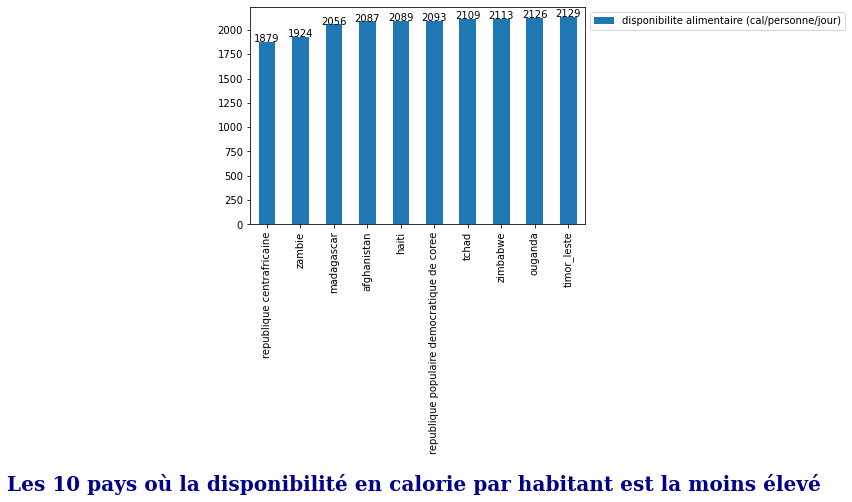

In [68]:
liste_cal_moins = [1879,1924,2056,2087,2089,2093,2109,2113,2126,2129]
dispo_par_habitant_par_pays1.plot(kind='bar')
plt.xlabel('Les 10 pays où la disponibilité en calorie par habitant est la moins élevé ',labelpad=20,fontsize=20,fontdict={'family':'serif','color' : 'darkblue','weight' : 'bold', 'size' : 30})
plt.legend(bbox_to_anchor=(1,1))

i = 0
j = 1
for i in range(len(dispo_par_habitant_par_pays1)):
    plt.annotate(liste_cal_moins[i], ( i, liste_cal_moins[i] + j), ha="center")

plt.show()


In [69]:
# Somme de la disponibilité de protéines en grammes par personnes par ans de chaque produit dans chaque pays
# Classement par ordre décroissant de la disponibilité de protéines par pays. 
dispo_par_habitant_par_pays= dispo_popula[['pays','produit','disponibilite alimentaire (cal/personne/jour)']].groupby(['pays']).sum()
dispo_par_habitant_par_pays2 = dispo_par_habitant_par_pays.sort_values(by= 'disponibilite alimentaire (cal/personne/jour)' ,ascending=False).head(10)
dispo_par_habitant_par_pays2

,disponibilite alimentaire (cal/personne/jour)
pays,
autriche,3770.0
belgique,3737.0
turquie,3708.0
états_unis d_amerique,3682.0
israel,3610.0
irlande,3602.0
italie,3578.0
luxembourg,3540.0
égypte,3518.0


In [70]:
dispo_par_habitant_par_pays2['disponibilite alimentaire (cal/personne/jour)'].tolist()

[3770.0,
 3737.0,
 3708.0,
 3682.0,
 3610.0,
 3602.0,
 3578.0,
 3540.0,
 3518.0,
 3503.0]

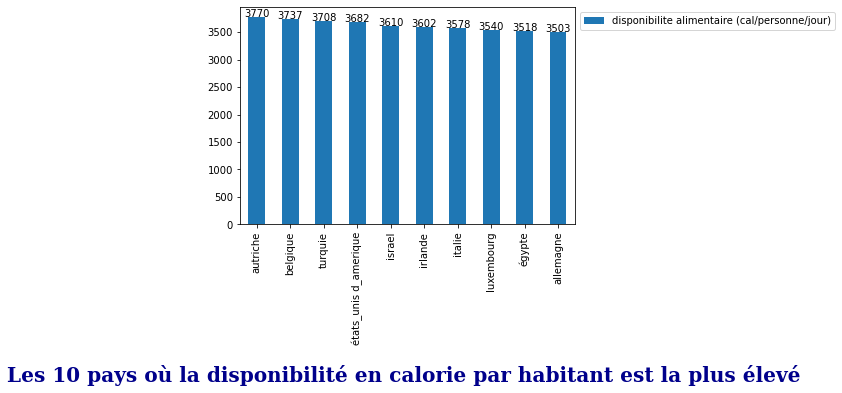

In [71]:
liste_cal_plus =[3770, 3737, 3708,3682, 3610, 3602, 3578, 3540, 3518, 3503]
dispo_par_habitant_par_pays2.plot(kind='bar')
plt.xlabel('Les 10 pays où la disponibilité en calorie par habitant est la plus élevé ',labelpad=20,fontsize=20,fontdict={'family':'serif','color' : 'darkblue','weight' : 'bold', 'size' : 30})
plt.legend(bbox_to_anchor=(1,1))
i = 0
j = 1
for i in range(len(dispo_par_habitant_par_pays2)):
    plt.annotate(liste_cal_plus[i], ( i, liste_cal_plus[i] + j), ha="center")
plt.show()

### Question VI - Utilisation du manioc par la Thaïlande aux égards de la proportion de personnes en sous-nutrition

In [72]:
# La proportion de personnes en sous nutrition en Thaïlande en 2017.
popu_sous_nutri_thai = popu_X_sousnutri['pays'] == 'thailande'
popu_X_sousnutri[popu_sous_nutri_thai]

,pays,nbr prsn en sous alim en millions,nbr habitant en millions,prop par pays
185,thailande,6200000.0,69209810.0,9.0


In [73]:
# Les données sur le manioc pour la Thaïlande.
thai_manioc= dispo_popula.loc[(dispo_alim["produit"]=="manioc") & (dispo_alim["pays"]=="thailande")]
thai_manioc

,pays,produit,origine,aliments pour animaux,autres utilisations,disponibilite alimentaire (cal/personne/jour),disponibilite alimentaire en quantite (kg/personne/an),disponibilite de matiere grasse en quantite (g/personne/jour),disponibilite de proteines en quantite (g/personne/jour),disponibilite interieure,exportations _ quantite,importations _ quantite,nourriture,pertes,production,semences,traitement,variation de stock,nbr habitant en millions,disponibilite alimentaire (cal/personne/ans)
13809,thailande,manioc,vegetale,1.800000e+09,2.081000e+09,40.0,13.0,0.05,0.14,6.264000e+09,2.521400e+10,1.250000e+09,871000000.0,1.511000e+09,3.022800e+10,0.0,0.0,0.0,69209810.0,14600.0


In [74]:
# Calcul du taux d'exportation du manioc en Thaïlande
taux_export =(thai_manioc["exportations _ quantite"].iloc[0] /thai_manioc["production"].iloc[0] )*100
print('Proportion de manioc exporté est de', "{:.2f}".format(taux_export), "%")

Proportion de manioc exporté est de 83.41 %


In [75]:
# Calcul de la disponibilité alimentaire du manioc en Thaïlande
dispo_alim_thai = thai_manioc["disponibilite alimentaire (cal/personne/jour)"].iloc[0]*365 * thai_manioc['nbr habitant en millions'].iloc[0]
print('La disponibilité alimentaire du manioc en Thaïlande est de ' + "{:.0f}".format(dispo_alim_thai/10**3) + ' calories')

La disponibilité alimentaire du manioc en Thaïlande est de 1010463226 calories


In [76]:
prop_manioc_thailand = 100 - taux_export
print('Ayant seulement ' + (str("{:.2f}".format(prop_manioc_thailand))) + '% de manioc restant en Thaïlande apres exportation.On peux se dire que si la Thaïlande diminue sa quantité exporter alors la disponibilité alimentaire du manioc en Thailande augmentera .')

Ayant seulement 16.59% de manioc restant en Thaïlande apres exportation.On peux se dire que si la Thaïlande diminue sa quantité exporter alors la disponibilité alimentaire du manioc en Thailande augmentera .
